In [1]:
from datasets import load_dataset
from fastai.tabular.all import *
from huggingface_hub import from_pretrained_fastai, notebook_login, push_to_hub_fastai
from scipy.interpolate import interp1d
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [2]:
top_tagging_ds = load_dataset("dl4phys/top_tagging")


Using custom data configuration dl4phys--top_tagging-f2922a48c8933599
Found cached dataset parquet (/Users/jakub/.cache/huggingface/datasets/dl4phys___parquet/dl4phys--top_tagging-f2922a48c8933599/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
top_tagging_ds

DatasetDict({
    train: Dataset({
        features: ['E_0', 'PX_0', 'PY_0', 'PZ_0', 'E_1', 'PX_1', 'PY_1', 'PZ_1', 'E_2', 'PX_2', 'PY_2', 'PZ_2', 'E_3', 'PX_3', 'PY_3', 'PZ_3', 'E_4', 'PX_4', 'PY_4', 'PZ_4', 'E_5', 'PX_5', 'PY_5', 'PZ_5', 'E_6', 'PX_6', 'PY_6', 'PZ_6', 'E_7', 'PX_7', 'PY_7', 'PZ_7', 'E_8', 'PX_8', 'PY_8', 'PZ_8', 'E_9', 'PX_9', 'PY_9', 'PZ_9', 'E_10', 'PX_10', 'PY_10', 'PZ_10', 'E_11', 'PX_11', 'PY_11', 'PZ_11', 'E_12', 'PX_12', 'PY_12', 'PZ_12', 'E_13', 'PX_13', 'PY_13', 'PZ_13', 'E_14', 'PX_14', 'PY_14', 'PZ_14', 'E_15', 'PX_15', 'PY_15', 'PZ_15', 'E_16', 'PX_16', 'PY_16', 'PZ_16', 'E_17', 'PX_17', 'PY_17', 'PZ_17', 'E_18', 'PX_18', 'PY_18', 'PZ_18', 'E_19', 'PX_19', 'PY_19', 'PZ_19', 'E_20', 'PX_20', 'PY_20', 'PZ_20', 'E_21', 'PX_21', 'PY_21', 'PZ_21', 'E_22', 'PX_22', 'PY_22', 'PZ_22', 'E_23', 'PX_23', 'PY_23', 'PZ_23', 'E_24', 'PX_24', 'PY_24', 'PZ_24', 'E_25', 'PX_25', 'PY_25', 'PZ_25', 'E_26', 'PX_26', 'PY_26', 'PZ_26', 'E_27', 'PX_27', 'PY_27', 'PZ_27', 'E_28'

In [4]:
top_tagging_ds["train"]

Dataset({
    features: ['E_0', 'PX_0', 'PY_0', 'PZ_0', 'E_1', 'PX_1', 'PY_1', 'PZ_1', 'E_2', 'PX_2', 'PY_2', 'PZ_2', 'E_3', 'PX_3', 'PY_3', 'PZ_3', 'E_4', 'PX_4', 'PY_4', 'PZ_4', 'E_5', 'PX_5', 'PY_5', 'PZ_5', 'E_6', 'PX_6', 'PY_6', 'PZ_6', 'E_7', 'PX_7', 'PY_7', 'PZ_7', 'E_8', 'PX_8', 'PY_8', 'PZ_8', 'E_9', 'PX_9', 'PY_9', 'PZ_9', 'E_10', 'PX_10', 'PY_10', 'PZ_10', 'E_11', 'PX_11', 'PY_11', 'PZ_11', 'E_12', 'PX_12', 'PY_12', 'PZ_12', 'E_13', 'PX_13', 'PY_13', 'PZ_13', 'E_14', 'PX_14', 'PY_14', 'PZ_14', 'E_15', 'PX_15', 'PY_15', 'PZ_15', 'E_16', 'PX_16', 'PY_16', 'PZ_16', 'E_17', 'PX_17', 'PY_17', 'PZ_17', 'E_18', 'PX_18', 'PY_18', 'PZ_18', 'E_19', 'PX_19', 'PY_19', 'PZ_19', 'E_20', 'PX_20', 'PY_20', 'PZ_20', 'E_21', 'PX_21', 'PY_21', 'PZ_21', 'E_22', 'PX_22', 'PY_22', 'PZ_22', 'E_23', 'PX_23', 'PY_23', 'PZ_23', 'E_24', 'PX_24', 'PY_24', 'PZ_24', 'E_25', 'PX_25', 'PY_25', 'PZ_25', 'E_26', 'PX_26', 'PY_26', 'PZ_26', 'E_27', 'PX_27', 'PY_27', 'PZ_27', 'E_28', 'PX_28', 'PY_28', 'PZ_28', 

In [5]:
len(top_tagging_ds["train"])

1211000

In [6]:
top_tagging_ds = top_tagging_ds.remove_columns(
    ["truthE", "truthPX", "truthPY", "truthPZ", "ttv"]
)

In [7]:
# Convert output format to DataFrames
top_tagging_ds.set_format("pandas")
# Create DataFrames for the training and test splits
train_df, test_df = top_tagging_ds["train"][:], top_tagging_ds["test"][:]
# Peek at first few rows
train_df.head()

,E_0,PX_0,PY_0,PZ_0,E_1,PX_1,PY_1,PZ_1,E_2,PX_2,...,PZ_197,E_198,PX_198,PY_198,PZ_198,E_199,PX_199,PY_199,PZ_199,is_signal_new
0,474.071136,-250.347031,-223.651962,-334.738098,103.236237,-48.866222,-56.790775,-71.025490,105.255569,-55.415001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,150.504532,120.062393,76.852005,-48.274265,82.257057,63.801739,42.754807,-29.454842,48.573559,36.763199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,251.645386,10.427651,-147.573746,203.564880,104.147797,10.718256,-54.497948,88.101395,78.043213,5.724113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,451.566132,129.885437,-99.066292,-420.984100,208.410919,59.033958,-46.177090,-194.467941,190.183304,54.069675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,399.093903,-168.432083,-47.205597,-358.717438,273.691956,-121.926941,-30.803854,-243.088928,152.837219,-44.400204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## FastAI DataLoaders

In [8]:
# Downsample to ~0.5 if you're running on Colab / Kaggle which have limited RAM
frac_of_samples = 1.0
train_df = train_df.sample(int(frac_of_samples * len(train_df)), random_state=42)

features = list(train_df.drop(columns=["is_signal_new"]).columns)
splits = RandomSplitter(valid_pct=0.20, seed=42)(range_of(train_df))

dls = TabularDataLoaders.from_df(
    df=train_df,
    cont_names=features,
    y_names="is_signal_new",
    y_block=CategoryBlock,
    splits=splits,
    bs=1024,
)

In [9]:
dls.show_batch()

,E_0,PX_0,PY_0,PZ_0,E_1,PX_1,PY_1,PZ_1,E_2,PX_2,PY_2,PZ_2,E_3,PX_3,PY_3,PZ_3,E_4,PX_4,PY_4,PZ_4,E_5,PX_5,PY_5,PZ_5,E_6,PX_6,PY_6,PZ_6,E_7,PX_7,PY_7,PZ_7,E_8,PX_8,PY_8,PZ_8,E_9,PX_9,PY_9,PZ_9,E_10,PX_10,PY_10,PZ_10,E_11,PX_11,PY_11,PZ_11,E_12,PX_12,PY_12,PZ_12,E_13,PX_13,PY_13,PZ_13,E_14,PX_14,PY_14,PZ_14,E_15,PX_15,PY_15,PZ_15,E_16,PX_16,PY_16,PZ_16,E_17,PX_17,PY_17,PZ_17,E_18,PX_18,PY_18,PZ_18,E_19,PX_19,PY_19,PZ_19,E_20,PX_20,PY_20,PZ_20,E_21,PX_21,PY_21,PZ_21,E_22,PX_22,PY_22,PZ_22,E_23,PX_23,PY_23,PZ_23,E_24,PX_24,PY_24,PZ_24,E_25,PX_25,PY_25,PZ_25,E_26,PX_26,PY_26,PZ_26,E_27,PX_27,PY_27,PZ_27,E_28,PX_28,PY_28,PZ_28,E_29,PX_29,PY_29,PZ_29,E_30,PX_30,PY_30,PZ_30,E_31,PX_31,PY_31,PZ_31,E_32,PX_32,PY_32,PZ_32,E_33,PX_33,PY_33,PZ_33,E_34,PX_34,PY_34,PZ_34,E_35,PX_35,PY_35,PZ_35,E_36,PX_36,PY_36,PZ_36,E_37,PX_37,PY_37,PZ_37,E_38,PX_38,PY_38,PZ_38,E_39,PX_39,PY_39,PZ_39,E_40,PX_40,PY_40,PZ_40,E_41,PX_41,PY_41,PZ_41,E_42,PX_42,PY_42,PZ_42,E_43,PX_43,PY_43,PZ_43,E_44,PX_44,PY_44,PZ_44,E_45,PX_45,PY_45,PZ_45,E_46,PX_46,PY_46,PZ_46,E_47,PX_47,PY_47,PZ_47,E_48,PX_48,PY_48,PZ_48,E_49,PX_49,PY_49,PZ_49,E_50,PX_50,PY_50,PZ_50,E_51,PX_51,PY_51,PZ_51,E_52,PX_52,PY_52,PZ_52,E_53,PX_53,PY_53,PZ_53,E_54,PX_54,PY_54,PZ_54,E_55,PX_55,PY_55,PZ_55,E_56,PX_56,PY_56,PZ_56,E_57,PX_57,PY_57,PZ_57,E_58,PX_58,PY_58,PZ_58,E_59,PX_59,PY_59,PZ_59,E_60,PX_60,PY_60,PZ_60,E_61,PX_61,PY_61,PZ_61,E_62,PX_62,PY_62,PZ_62,E_63,PX_63,PY_63,PZ_63,E_64,PX_64,PY_64,PZ_64,E_65,PX_65,PY_65,PZ_65,E_66,PX_66,PY_66,PZ_66,E_67,PX_67,PY_67,PZ_67,E_68,PX_68,PY_68,PZ_68,E_69,PX_69,PY_69,PZ_69,E_70,PX_70,PY_70,PZ_70,E_71,PX_71,PY_71,PZ_71,E_72,PX_72,PY_72,PZ_72,E_73,PX_73,PY_73,PZ_73,E_74,PX_74,PY_74,PZ_74,E_75,PX_75,PY_75,PZ_75,E_76,PX_76,PY_76,PZ_76,E_77,PX_77,PY_77,PZ_77,E_78,PX_78,PY_78,PZ_78,E_79,PX_79,PY_79,PZ_79,E_80,PX_80,PY_80,PZ_80,E_81,PX_81,PY_81,PZ_81,E_82,PX_82,PY_82,PZ_82,E_83,PX_83,PY_83,PZ_83,E_84,PX_84,PY_84,PZ_84,E_85,PX_85,PY_85,PZ_85,E_86,PX_86,PY_86,PZ_86,E_87,PX_87,PY_87,PZ_87,E_88,PX_88,PY_88,PZ_88,E_89,PX_89,PY_89,PZ_89,E_90,PX_90,PY_90,PZ_90,E_91,PX_91,PY_91,PZ_91,E_92,PX_92,PY_92,PZ_92,E_93,PX_93,PY_93,PZ_93,E_94,PX_94,PY_94,PZ_94,E_95,PX_95,PY_95,PZ_95,E_96,PX_96,PY_96,PZ_96,E_97,PX_97,PY_97,PZ_97,E_98,PX_98,PY_98,PZ_98,E_99,PX_99,PY_99,PZ_99,E_100,PX_100,PY_100,PZ_100,E_101,PX_101,PY_101,PZ_101,E_102,PX_102,PY_102,PZ_102,E_103,PX_103,PY_103,PZ_103,E_104,PX_104,PY_104,PZ_104,E_105,PX_105,PY_105,PZ_105,E_106,PX_106,PY_106,PZ_106,E_107,PX_107,PY_107,PZ_107,E_108,PX_108,PY_108,PZ_108,E_109,PX_109,PY_109,PZ_109,E_110,PX_110,PY_110,PZ_110,E_111,PX_111,PY_111,PZ_111,E_112,PX_112,PY_112,PZ_112,E_113,PX_113,PY_113,PZ_113,E_114,PX_114,PY_114,PZ_114,E_115,PX_115,PY_115,PZ_115,E_116,PX_116,PY_116,PZ_116,E_117,PX_117,PY_117,PZ_117,E_118,PX_118,PY_118,PZ_118,E_119,PX_119,PY_119,PZ_119,E_120,PX_120,PY_120,PZ_120,E_121,PX_121,PY_121,PZ_121,E_122,PX_122,PY_122,PZ_122,E_123,PX_123,PY_123,PZ_123,E_124,PX_124,PY_124,PZ_124,E_125,PX_125,PY_125,PZ_125,E_126,PX_126,PY_126,PZ_126,E_127,PX_127,PY_127,PZ_127,E_128,PX_128,PY_128,PZ_128,E_129,PX_129,PY_129,PZ_129,E_130,PX_130,PY_130,PZ_130,E_131,PX_131,PY_131,PZ_131,E_132,PX_132,PY_132,PZ_132,E_133,PX_133,PY_133,PZ_133,E_134,PX_134,PY_134,PZ_134,E_135,PX_135,PY_135,PZ_135,E_136,PX_136,PY_136,PZ_136,E_137,PX_137,PY_137,PZ_137,E_138,PX_138,PY_138,PZ_138,E_139,PX_139,PY_139,PZ_139,E_140,PX_140,PY_140,PZ_140,E_141,PX_141,PY_141,PZ_141,E_142,PX_142,PY_142,PZ_142,E_143,PX_143,PY_143,PZ_143,E_144,PX_144,PY_144,PZ_144,E_145,PX_145,PY_145,PZ_145,E_146,PX_146,PY_146,PZ_146,E_147,PX_147,PY_147,PZ_147,E_148,PX_148,PY_148,PZ_148,E_149,PX_149,PY_149,PZ_149,E_150,PX_150,PY_150,PZ_150,E_151,PX_151,PY_151,PZ_151,E_152,PX_152,PY_152,PZ_152,E_153,PX_153,PY_153,PZ_153,E_154,PX_154,PY_154,PZ_154,E_155,PX_155,PY_155,PZ_155,E_156,PX_156,PY_156,PZ_156,E_157,PX_157,PY_157,PZ_157,E_158,PX_158,PY_158,PZ_158,E_159,PX_159,PY_159,PZ_159,E_160,PX_160,PY_160,PZ_160,E_161,PX_161,PY_161,PZ_161,E_162,PX_162,PY_162,PZ_162,E_163,PX_163,PY_163,PZ_163,E_164,PX_16

## Learner - Tabular Model

In [10]:
learn = tabular_learner(
    dls, layers=[200, 200, 50, 50], metrics=[accuracy, RocAucBinary()]
)

In [11]:
learn.summary()

TabularModel (Input shape: 1024 x 0)
Layer (type)         Output Shape         Param #    Trainable 
                     1024 x 800          
BatchNorm1d                               1600       True      
____________________________________________________________________________
                     1024 x 200          
Linear                                    160000     True      
ReLU                                                           
BatchNorm1d                               400        True      
Linear                                    40000      True      
ReLU                                                           
BatchNorm1d                               400        True      
____________________________________________________________________________
                     1024 x 50           
Linear                                    10000      True      
ReLU                                                           
BatchNorm1d                               1

Finding learning rate

SuggestedLRs(valley=0.0014454397605732083)

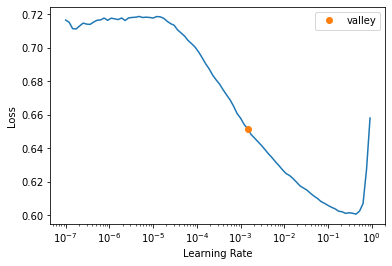

In [12]:
learn.lr_find()

## Training

In [13]:
learn.fit_one_cycle(n_epoch=3, lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.516639,0.510640,0.733774,0.808236,04:35
1,0.425046,0.409908,0.806115,0.889215,03:42
2,0.382294,0.373090,0.830888,0.907570,03:09


In [14]:
learn.show_results()

,E_0,PX_0,PY_0,PZ_0,E_1,PX_1,PY_1,PZ_1,E_2,PX_2,PY_2,PZ_2,E_3,PX_3,PY_3,PZ_3,E_4,PX_4,PY_4,PZ_4,E_5,PX_5,PY_5,PZ_5,E_6,PX_6,PY_6,PZ_6,E_7,PX_7,PY_7,PZ_7,E_8,PX_8,PY_8,PZ_8,E_9,PX_9,PY_9,PZ_9,E_10,PX_10,PY_10,PZ_10,E_11,PX_11,PY_11,PZ_11,E_12,PX_12,PY_12,PZ_12,E_13,PX_13,PY_13,PZ_13,E_14,PX_14,PY_14,PZ_14,E_15,PX_15,PY_15,PZ_15,E_16,PX_16,PY_16,PZ_16,E_17,PX_17,PY_17,PZ_17,E_18,PX_18,PY_18,PZ_18,E_19,PX_19,PY_19,PZ_19,E_20,PX_20,PY_20,PZ_20,E_21,PX_21,PY_21,PZ_21,E_22,PX_22,PY_22,PZ_22,E_23,PX_23,PY_23,PZ_23,E_24,PX_24,PY_24,PZ_24,E_25,PX_25,PY_25,PZ_25,E_26,PX_26,PY_26,PZ_26,E_27,PX_27,PY_27,PZ_27,E_28,PX_28,PY_28,PZ_28,E_29,PX_29,PY_29,PZ_29,E_30,PX_30,PY_30,PZ_30,E_31,PX_31,PY_31,PZ_31,E_32,PX_32,PY_32,PZ_32,E_33,PX_33,PY_33,PZ_33,E_34,PX_34,PY_34,PZ_34,E_35,PX_35,PY_35,PZ_35,E_36,PX_36,PY_36,PZ_36,E_37,PX_37,PY_37,PZ_37,E_38,PX_38,PY_38,PZ_38,E_39,PX_39,PY_39,PZ_39,E_40,PX_40,PY_40,PZ_40,E_41,PX_41,PY_41,PZ_41,E_42,PX_42,PY_42,PZ_42,E_43,PX_43,PY_43,PZ_43,E_44,PX_44,PY_44,PZ_44,E_45,PX_45,PY_45,PZ_45,E_46,PX_46,PY_46,PZ_46,E_47,PX_47,PY_47,PZ_47,E_48,PX_48,PY_48,PZ_48,E_49,PX_49,PY_49,PZ_49,E_50,PX_50,PY_50,PZ_50,E_51,PX_51,PY_51,PZ_51,E_52,PX_52,PY_52,PZ_52,E_53,PX_53,PY_53,PZ_53,E_54,PX_54,PY_54,PZ_54,E_55,PX_55,PY_55,PZ_55,E_56,PX_56,PY_56,PZ_56,E_57,PX_57,PY_57,PZ_57,E_58,PX_58,PY_58,PZ_58,E_59,PX_59,PY_59,PZ_59,E_60,PX_60,PY_60,PZ_60,E_61,PX_61,PY_61,PZ_61,E_62,PX_62,PY_62,PZ_62,E_63,PX_63,PY_63,PZ_63,E_64,PX_64,PY_64,PZ_64,E_65,PX_65,PY_65,PZ_65,E_66,PX_66,PY_66,PZ_66,E_67,PX_67,PY_67,PZ_67,E_68,PX_68,PY_68,PZ_68,E_69,PX_69,PY_69,PZ_69,E_70,PX_70,PY_70,PZ_70,E_71,PX_71,PY_71,PZ_71,E_72,PX_72,PY_72,PZ_72,E_73,PX_73,PY_73,PZ_73,E_74,PX_74,PY_74,PZ_74,E_75,PX_75,PY_75,PZ_75,E_76,PX_76,PY_76,PZ_76,E_77,PX_77,PY_77,PZ_77,E_78,PX_78,PY_78,PZ_78,E_79,PX_79,PY_79,PZ_79,E_80,PX_80,PY_80,PZ_80,E_81,PX_81,PY_81,PZ_81,E_82,PX_82,PY_82,PZ_82,E_83,PX_83,PY_83,PZ_83,E_84,PX_84,PY_84,PZ_84,E_85,PX_85,PY_85,PZ_85,E_86,PX_86,PY_86,PZ_86,E_87,PX_87,PY_87,PZ_87,E_88,PX_88,PY_88,PZ_88,E_89,PX_89,PY_89,PZ_89,E_90,PX_90,PY_90,PZ_90,E_91,PX_91,PY_91,PZ_91,E_92,PX_92,PY_92,PZ_92,E_93,PX_93,PY_93,PZ_93,E_94,PX_94,PY_94,PZ_94,E_95,PX_95,PY_95,PZ_95,E_96,PX_96,PY_96,PZ_96,E_97,PX_97,PY_97,PZ_97,E_98,PX_98,PY_98,PZ_98,E_99,PX_99,PY_99,PZ_99,E_100,PX_100,PY_100,PZ_100,E_101,PX_101,PY_101,PZ_101,E_102,PX_102,PY_102,PZ_102,E_103,PX_103,PY_103,PZ_103,E_104,PX_104,PY_104,PZ_104,E_105,PX_105,PY_105,PZ_105,E_106,PX_106,PY_106,PZ_106,E_107,PX_107,PY_107,PZ_107,E_108,PX_108,PY_108,PZ_108,E_109,PX_109,PY_109,PZ_109,E_110,PX_110,PY_110,PZ_110,E_111,PX_111,PY_111,PZ_111,E_112,PX_112,PY_112,PZ_112,E_113,PX_113,PY_113,PZ_113,E_114,PX_114,PY_114,PZ_114,E_115,PX_115,PY_115,PZ_115,E_116,PX_116,PY_116,PZ_116,E_117,PX_117,PY_117,PZ_117,E_118,PX_118,PY_118,PZ_118,E_119,PX_119,PY_119,PZ_119,E_120,PX_120,PY_120,PZ_120,E_121,PX_121,PY_121,PZ_121,E_122,PX_122,PY_122,PZ_122,E_123,PX_123,PY_123,PZ_123,E_124,PX_124,PY_124,PZ_124,E_125,PX_125,PY_125,PZ_125,E_126,PX_126,PY_126,PZ_126,E_127,PX_127,PY_127,PZ_127,E_128,PX_128,PY_128,PZ_128,E_129,PX_129,PY_129,PZ_129,E_130,PX_130,PY_130,PZ_130,E_131,PX_131,PY_131,PZ_131,E_132,PX_132,PY_132,PZ_132,E_133,PX_133,PY_133,PZ_133,E_134,PX_134,PY_134,PZ_134,E_135,PX_135,PY_135,PZ_135,E_136,PX_136,PY_136,PZ_136,E_137,PX_137,PY_137,PZ_137,E_138,PX_138,PY_138,PZ_138,E_139,PX_139,PY_139,PZ_139,E_140,PX_140,PY_140,PZ_140,E_141,PX_141,PY_141,PZ_141,E_142,PX_142,PY_142,PZ_142,E_143,PX_143,PY_143,PZ_143,E_144,PX_144,PY_144,PZ_144,E_145,PX_145,PY_145,PZ_145,E_146,PX_146,PY_146,PZ_146,E_147,PX_147,PY_147,PZ_147,E_148,PX_148,PY_148,PZ_148,E_149,PX_149,PY_149,PZ_149,E_150,PX_150,PY_150,PZ_150,E_151,PX_151,PY_151,PZ_151,E_152,PX_152,PY_152,PZ_152,E_153,PX_153,PY_153,PZ_153,E_154,PX_154,PY_154,PZ_154,E_155,PX_155,PY_155,PZ_155,E_156,PX_156,PY_156,PZ_156,E_157,PX_157,PY_157,PZ_157,E_158,PX_158,PY_158,PZ_158,E_159,PX_159,PY_159,PZ_159,E_160,PX_160,PY_160,PZ_160,E_161,PX_161,PY_161,PZ_161,E_162,PX_162,PY_162,PZ_162,E_163,PX_163,PY_163,PZ_163,E_164,PX_16

## Model Evaluation

In [15]:
test_dl = learn.dls.test_dl(test_items=test_df)

In [16]:
preds, targs = learn.get_preds(dl=test_dl)

In [17]:
preds[:5], targs[:5]

(tensor([[0.9989, 0.0011],
         [0.7789, 0.2211],
         [0.9449, 0.0551],
         [0.3912, 0.6088],
         [0.9609, 0.0391]]),
 tensor([[0],
         [0],
         [0],
         [0],
         [0]], dtype=torch.int8))

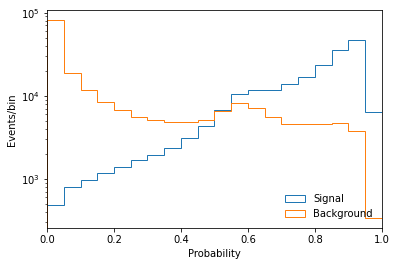

In [18]:
signal_test = preds[:, 1][targs.flatten() == 1].numpy()
background_test = preds[:, 1][targs.flatten() == 0].numpy()

plt.hist(signal_test, histtype="step", bins=20, range=(0, 1), label="Signal")
plt.hist(background_test, histtype="step", bins=20, range=(0, 1), label="Background")
plt.xlabel("Probability")
plt.ylabel("Events/bin")
plt.yscale("log")
plt.xlim(0, 1)
plt.legend(loc="lower right", frameon=False)
plt.show()

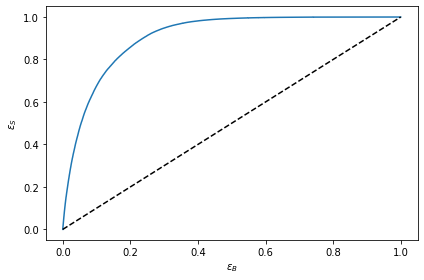

In [19]:
# fpr = epsilon_B, tpr = epsilon_S
fpr, tpr, thresholds = roc_curve(y_true=targs, y_score=preds[:, 1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ls="--", color="k")
plt.xlabel(r"$\epsilon_B$")
plt.ylabel(r"$\epsilon_S$")
plt.tight_layout()

In [20]:
acc_test = accuracy_score(targs, preds.argmax(dim=-1))
auc_test = auc(fpr, tpr)
print(f"Accuracy: {acc_test:.4f}")
print(f"AUC: {auc_test:.4f}")

Accuracy: 0.8312
AUC: 0.9075


In [21]:
background_eff = interp1d(tpr, fpr)
background_eff_at_30 = background_eff(0.3)
print(f"Backround rejection at signal efficiency 0.3: {1/background_eff_at_30:0.3f}")

Backround rejection at signal efficiency 0.3: 41.274


In [22]:
def compute_metrics(learn, test_df):
    test_dl = learn.dls.test_dl(test_items=test_df)
    preds, targs = learn.get_preds(dl=test_dl)
    fpr, tpr, _ = roc_curve(y_true=targs, y_score=preds[:, 1])
    acc_test = accuracy_score(targs, preds.argmax(dim=-1))
    auc_test = auc(fpr, tpr)
    background_eff = interp1d(tpr, fpr)
    background_eff_at_30 = background_eff(0.3)

    print(f"Accuracy: {acc_test:.4f}")
    print(f"AUC: {auc_test:.4f}")
    print(
        f"Backround rejection at signal efficiency 0.3: {1/background_eff_at_30:0.3f}"
    )
    return fpr, tpr

In [23]:
fpr_baseline, tpr_baseline = compute_metrics(learn, test_df)

Accuracy: 0.8312
AUC: 0.9075
Backround rejection at signal efficiency 0.3: 41.274
